In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Train-Set.csv')

#Preprocessing the data

# inspecting the data

In [ ]:
print(df.head())

  ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.270

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
            Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean  

#dropping irrelevant columns
#not considering ProductID, and OutletID

In [ ]:
df.drop(['ProductID', 'OutletID'], axis=1, inplace=True)

#filling missing values

#for [WEIGHT]

In [ ]:
print(df['Weight'].skew())

0.0824262091221237


#approximately symmetric
#finding if there are any outliers

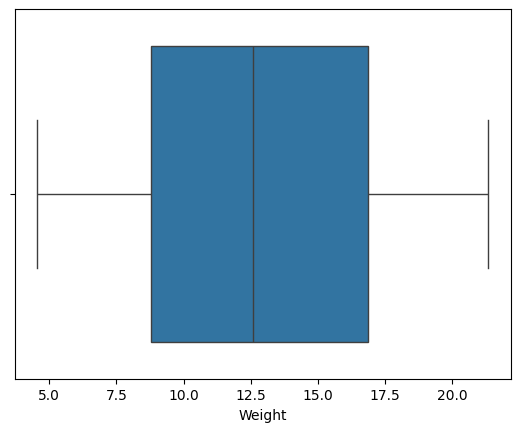

In [ ]:
sns.boxplot(x=df['Weight'])
plt.show()

In [ ]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

#for [OutletSize]

#filling missing values in OuletSize based on the OutletType

In [ ]:
mode_of_Outlet_size = df.pivot_table(values='OutletSize', columns='OutletType', aggfunc=lambda x: x.mode()[0])
print(mode_of_Outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
miss_values = df['OutletSize'].isnull()
df.loc[miss_values, 'OutletSize'] = df.loc[miss_values, 'OutletType'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
df.isnull().sum()

,0
Weight,0
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
EstablishmentYear,0
OutletSize,0
LocationType,0
OutletType,0
OutletSales,0


### no missing values

### CHECKING FOR UNIQUE VALUES IN CATEGORICAL COLUMNS

In [ ]:
categorical_cols = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']

for col in categorical_cols:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-" * 40)

FatContent unique values:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------
ProductType unique values:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
OutletSize unique values:
['Medium' 'Small' 'High']
----------------------------------------
LocationType unique values:
['Tier 1' 'Tier 3' 'Tier 2']
----------------------------------------
OutletType unique values:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
----------------------------------------


In [ ]:
df['FatContent'] = df['FatContent'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [ ]:
print(df['FatContent'].unique())

['Low Fat' 'Regular']


### LABEL ENCODING

In [ ]:
df = pd.get_dummies(df, columns=[
    'FatContent', 'ProductType', 'OutletSize',
    'LocationType', 'OutletType'
], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   EstablishmentYear                  8523 non-null   int64  
 4   OutletSales                        8523 non-null   float64
 5   FatContent_Regular                 8523 non-null   bool   
 6   ProductType_Breads                 8523 non-null   bool   
 7   ProductType_Breakfast              8523 non-null   bool   
 8   ProductType_Canned                 8523 non-null   bool   
 9   ProductType_Dairy                  8523 non-null   bool   
 10  ProductType_Frozen Foods           8523 non-null   bool   
 11  ProductType_Fruits and Vegetables  8523 non-null   bool 

## adding Outlet_age and dropping Establishment Year

In [ ]:
df['OutletAge'] = 2025 - df['EstablishmentYear']
df.drop('EstablishmentYear', axis=1, inplace=True)

In [ ]:
X = df.drop(columns='OutletSales', axis=1).values
Y = df['OutletSales'].values

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(8523, 27) (6818, 27) (1705, 27)


In [ ]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        data = np.concatenate([X, y.reshape(-1, 1)], axis=1)
        self.tree = self._build_tree(data)

    def _build_tree(self, data, depth=0):
        X, y = data[:, :-1], data[:, -1]
        if len(y) < self.min_samples_split or depth >= self.max_depth:
            return np.mean(y)

        best_feature, best_thresh, best_loss = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for thresh in thresholds:
                left = data[X[:, feature] <= thresh]
                right = data[X[:, feature] > thresh]
                if len(left) == 0 or len(right) == 0:
                    continue
                loss = np.var(left[:, -1]) * len(left) + np.var(right[:, -1]) * len(right)
                if loss < best_loss:
                    best_loss = loss
                    best_feature = feature
                    best_thresh = thresh

        if best_feature is None:
            return np.mean(y)

        left = data[X[:, best_feature] <= best_thresh]
        right = data[X[:, best_feature] > best_thresh]
        return {
            'feature': best_feature,
            'threshold': best_thresh,
            'left': self._build_tree(left, depth + 1),
            'right': self._build_tree(right, depth + 1)
        }

    def _predict_sample(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])


In [ ]:
class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=50, learning_rate=0.5, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_pred = None

    def fit(self, X, y):
        y = y.astype(np.float64)
        self.initial_pred = np.mean(y)
        y_pred = np.full_like(y, self.initial_pred, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)

            update = tree.predict(X)
            y_pred += self.learning_rate * update

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_pred, dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


In [ ]:
# Train the model
model = GradientBoostingRegressorScratch(n_estimators=10, learning_rate=0.1, max_depth=3)

model.fit(x_train, y_train)
# Predict
y_pred_xgb = model.predict(x_test)

In [ ]:
# Make predictions
y_pred_xgb = model.predict(x_test)

# Print only first 10 rows with their feature values, predicted and actual sales
for i in range(min(10, len(x_test))):
    features = x_test[i]
    print(f"Row {i+1}: Features = {features}, Predicted = {y_pred_xgb[i]:.2f}, Actual = {y_test[i]:.2f}")



Row 1: Features = [14.3 0.026299797 79.4302 False False False False False True False False
 False False False False False False False False False False False True
 True False False 38], Predicted = 1579.40, Actual = 1743.06
Row 2: Features = [7.93 0.07113587 42.7086 False False False False False False False False
 True False False False False False False False False True False False
 True False False 28], Predicted = 1261.31, Actual = 356.87
Row 3: Features = [14.5 0.041313203 42.0454 True False False True False False False False
 False False False False False False False False True False False False
 True False False 26], Predicted = 1261.31, Actual = 377.51
Row 4: Features = [12.857645184135976 0.044767032 173.7054 True False False False False
 False False False False False False False False False True False True
 False False True False False True 40], Predicted = 3780.32, Actual = 5778.48
Row 5: Features = [10.195 0.012455787 197.511 True False False False False False False False
 F

In [ ]:


# XGBoost (scratch)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)



print("\n🔹 XGBoost")
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)


🔹 XGBoost
RMSE: 1212.632390353079
R² Score: 0.45897957737119444


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   OutletSales                        8523 non-null   float64
 4   FatContent_Regular                 8523 non-null   bool   
 5   ProductType_Breads                 8523 non-null   bool   
 6   ProductType_Breakfast              8523 non-null   bool   
 7   ProductType_Canned                 8523 non-null   bool   
 8   ProductType_Dairy                  8523 non-null   bool   
 9   ProductType_Frozen Foods           8523 non-null   bool   
 10  ProductType_Fruits and Vegetables  8523 non-null   bool   
 11  ProductType_Hard Drinks            8523 non-null   bool 